In [ ]:
###### CRISPR sample

!gdown 1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
!gdown 1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS

### To make thinngs faster for the student, here is the indexed mouse genome, mm10.
### You have to donwload it and decompressed it, you will get both the fasta and the BWT'ed files. Note all have same prefix Mouse<.files>.
### Next semester we will cover how specialized computers are often used to solve this aligmnet problems faster.

!gdown 1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar

In [ ]:
#Install required tools

!apt install bwa
!apt install samtools
!apt install bcftools


In [ ]:
#decompressed tar file

import subprocess

# Define the path to your tar.gz file and the destination directory
tar_gz_path = '/content/drive/MyDrive/MM10.tar.gz'
destination_directory = '/content/drive/MyDrive'

# Run the tar
subprocess.run(['tar', '-xvzf', tar_gz_path, '-C', destination_directory], check=True)


In [ ]:
#bwa mem (aligned reads)

!bwa mem drive/MyDrive/MM10/Mouse drive/MyDrive/CRISPR.R1.fastq drive/MyDrive/CRISPR.R2.fastq > CRISPR.sam

In [ ]:
#Convert SAM to BAM

!samtools

!samtools view -Sb CRISPR.sam | samtools sort -o CRISPR.bam.sorted

In [ ]:
#check CRISPR.bam file

!head -n 100 CRISPR.bam.sorted

In [ ]:
# Convert BAM to VCF

!bcftools mpileup -Ou -f drive/MyDrive/MM10/Mouse.fasta CRISPR.bam.sorted | bcftools call -mv -Ov -o CRISPR.Variants.vcf


In [ ]:
#Check if vcf file generated

!head /content/drive/MyDrive/CRISPR.Variants.vcf

In [11]:
# Write vcf file to tsv file

!pip install cyvcf2
import cyvcf2
vcf_reader = cyvcf2.VCF('/content/drive/MyDrive/CRISPR.Variants.vcf')

with open('CRISPR.tsv', 'w') as file:
    for variant in vcf_reader:
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.INFO.get('DP')}\t{variant.FILTER}\t{genotype}\n"
        file.write(data_string)

In [ ]:
#Convert VCF to panda dataframe

import pandas as pd

columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'DP', 'FILTER', 'GENOTYPE']

df_1 = pd.read_csv('CRISPR.tsv', sep = '\t', header = None, names = columns )

df_1.head()


In [ ]:
# Check POS datatype and the number of rows
df_1.dtypes

df_1 #55920 rows

In [41]:
# Create dataset for CRISPR induced mutation

df_chr2 = df_1[df_1['CHROM'] == 'chr2']

pos_id = [ 36937210, 36996899 , 85400441 , 85776687 , 85918029 , 86198668 , 86236802 , 86658391 , 87049235]

df_induced = df_chr2[df_chr2['POS'].isin(pos_id)]

df_induced


,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
5092,chr2,36937210,None,C,T,194.453003,28,None,1
5093,chr2,36996899,None,CTTTTT,CTTTTTT,185.158005,26,None,3
6349,chr2,85400441,None,A,G,228.171005,37,None,3
6358,chr2,85776687,None,T,A,115.749001,27,None,1
6364,chr2,85918029,None,T,C,118.149002,72,None,1
6373,chr2,86198668,None,A,G,228.250000,25,None,3
6380,chr2,86236802,None,CT,CTT,228.218994,37,None,3
6404,chr2,86658391,None,C,CG,174.298996,24,None,3
6415,chr2,87049235,None,G,T,102.330002,23,None,3


In [42]:
# Create dataset for Off target mutation

df_off_tar = df_1[~df_1['POS'].isin(pos_id)]

df_off_tar #55911 rows



,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
0,chr1,3692703,None,A,T,8.99921,1,None,3
1,chr1,3692705,None,T,A,5.75677,1,None,3
2,chr1,3692706,None,T,A,8.99921,1,None,3
3,chr1,3758429,None,A,G,8.99921,1,None,3
4,chr1,3779522,None,T,A,8.99921,1,None,3
...,...,...,...,...,...,...,...,...,...
55915,chrY,88047416,None,A,T,5.75677,1,None,3
55916,chrY,88533987,None,G,C,8.99921,1,None,3
55917,chrY,88796561,None,A,T,5.75677,1,None,3
55918,chrY,90090135,None,T,A,5.75677,1,None,3


In [43]:
# A Summary data frame with number of mutations and genotype per chromosmome
#considering only off-target changes

summary_data = df_off_tar.groupby(['CHROM', 'GENOTYPE']).size().reset_index(name='Count')

summary_data


,CHROM,GENOTYPE,Count
0,chr1,1,272
1,chr1,3,4078
2,chr10,1,198
3,chr10,3,2852
4,chr11,1,212
5,chr11,3,2152
6,chr12,1,122
7,chr12,3,2355
8,chr13,1,187
9,chr13,3,2193


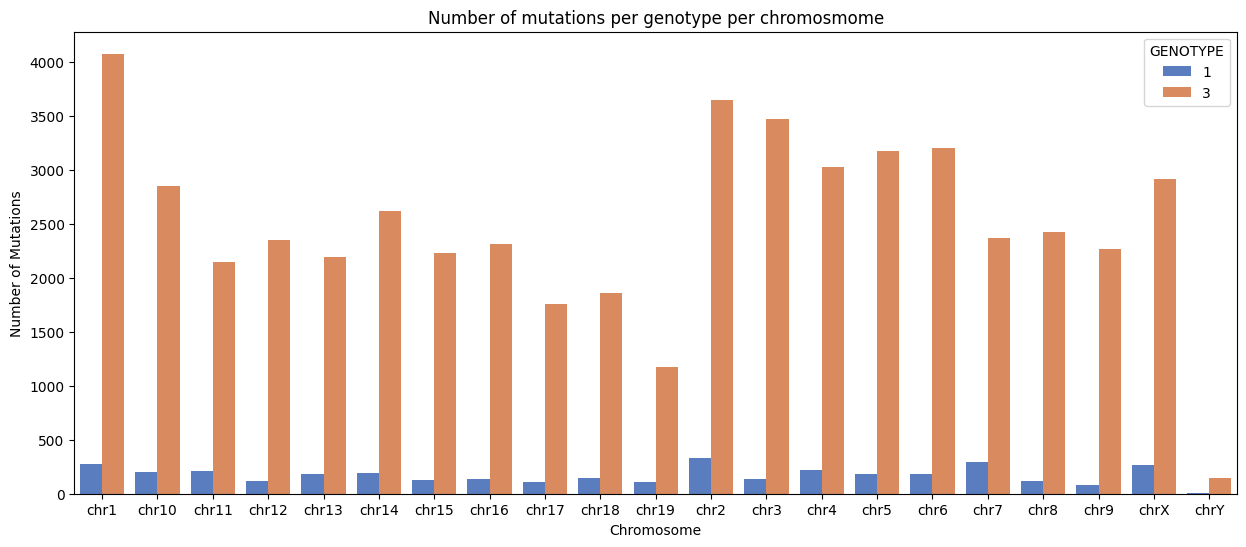

In [40]:
#create a paired bar chat for summary_data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 6))
sns.barplot(summary_data, x = 'CHROM', y = 'Count', hue = 'GENOTYPE',
            palette= 'muted' )
plt.ylabel('Number of Mutations')
plt.xlabel('Chromosome')
plt.title('Number of mutations per genotype per chromosmome')
plt.show()